# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png">LYCET PROJECT -- Documentation -- AC 207

### Date of final version: 12/10/2022<br>
### Group members:
$\color{rgb(0, 176, 255)}{\text{(L)oralee Ryan}}$

$\color{rgb(0, 176, 255)}{\text{(Y)anis Vandecasteele}}$

$\color{rgb(0, 176, 255)}{\text{(C)helsey Campillo}}$

$\color{rgb(0, 176, 255)}{\text{(E)laine Swanson}}$

$\color{rgb(0, 176, 255)}{\text{(T)adhg Looram}}$

## Introduction

   Our software, LYCET, represents compositional learning. LYCET is a laboratory where we formalize and optimize complicated computational structures with a well-established tool called automatic differentiation (AD). This tool uses simple arithmetic expressions (functions of one distinguished variable) in an algorithm. It does so to mechanically transform a numeric function and calculate the derivatives of that function efficiently. This is important because a LYCET user wants to know information about that function’s derivative for a variety of available implementations in science, economics, and engineering (e.g. microfluidics, finance, agriculture). Numerical analysis of ODEs/PDEs, optimization, and linearization are a few of these implementations that rely on the fundamental mathematical process of differentiation.
    
   However, the method used to gain information on the function’s derivative might not be stable or computationally realistic. Finite differentiation (FD) is one method alternative to AD. FD is a common tool used in numerical analysis where an exact formula for $f(x)$ is not known. In this tool, there is only a set of data points to approximate the functional relationship by estimating the rate of change of the output with respect to the input. The finite difference formulas to compute these approximations occurs with the cost of introducing error and possible stability issues.
    
   There is also the method of symbolic differentiation (SD). Similar to AD, SD uses the chain rule to calculate the resulting derivative. Where it differs from AD is its focus on manipulating the mathematical expressions rather than manipulating the numerical values. Depending on the complexity of $f(x)$, this may be too computationally expensive or not even applicable. 
   
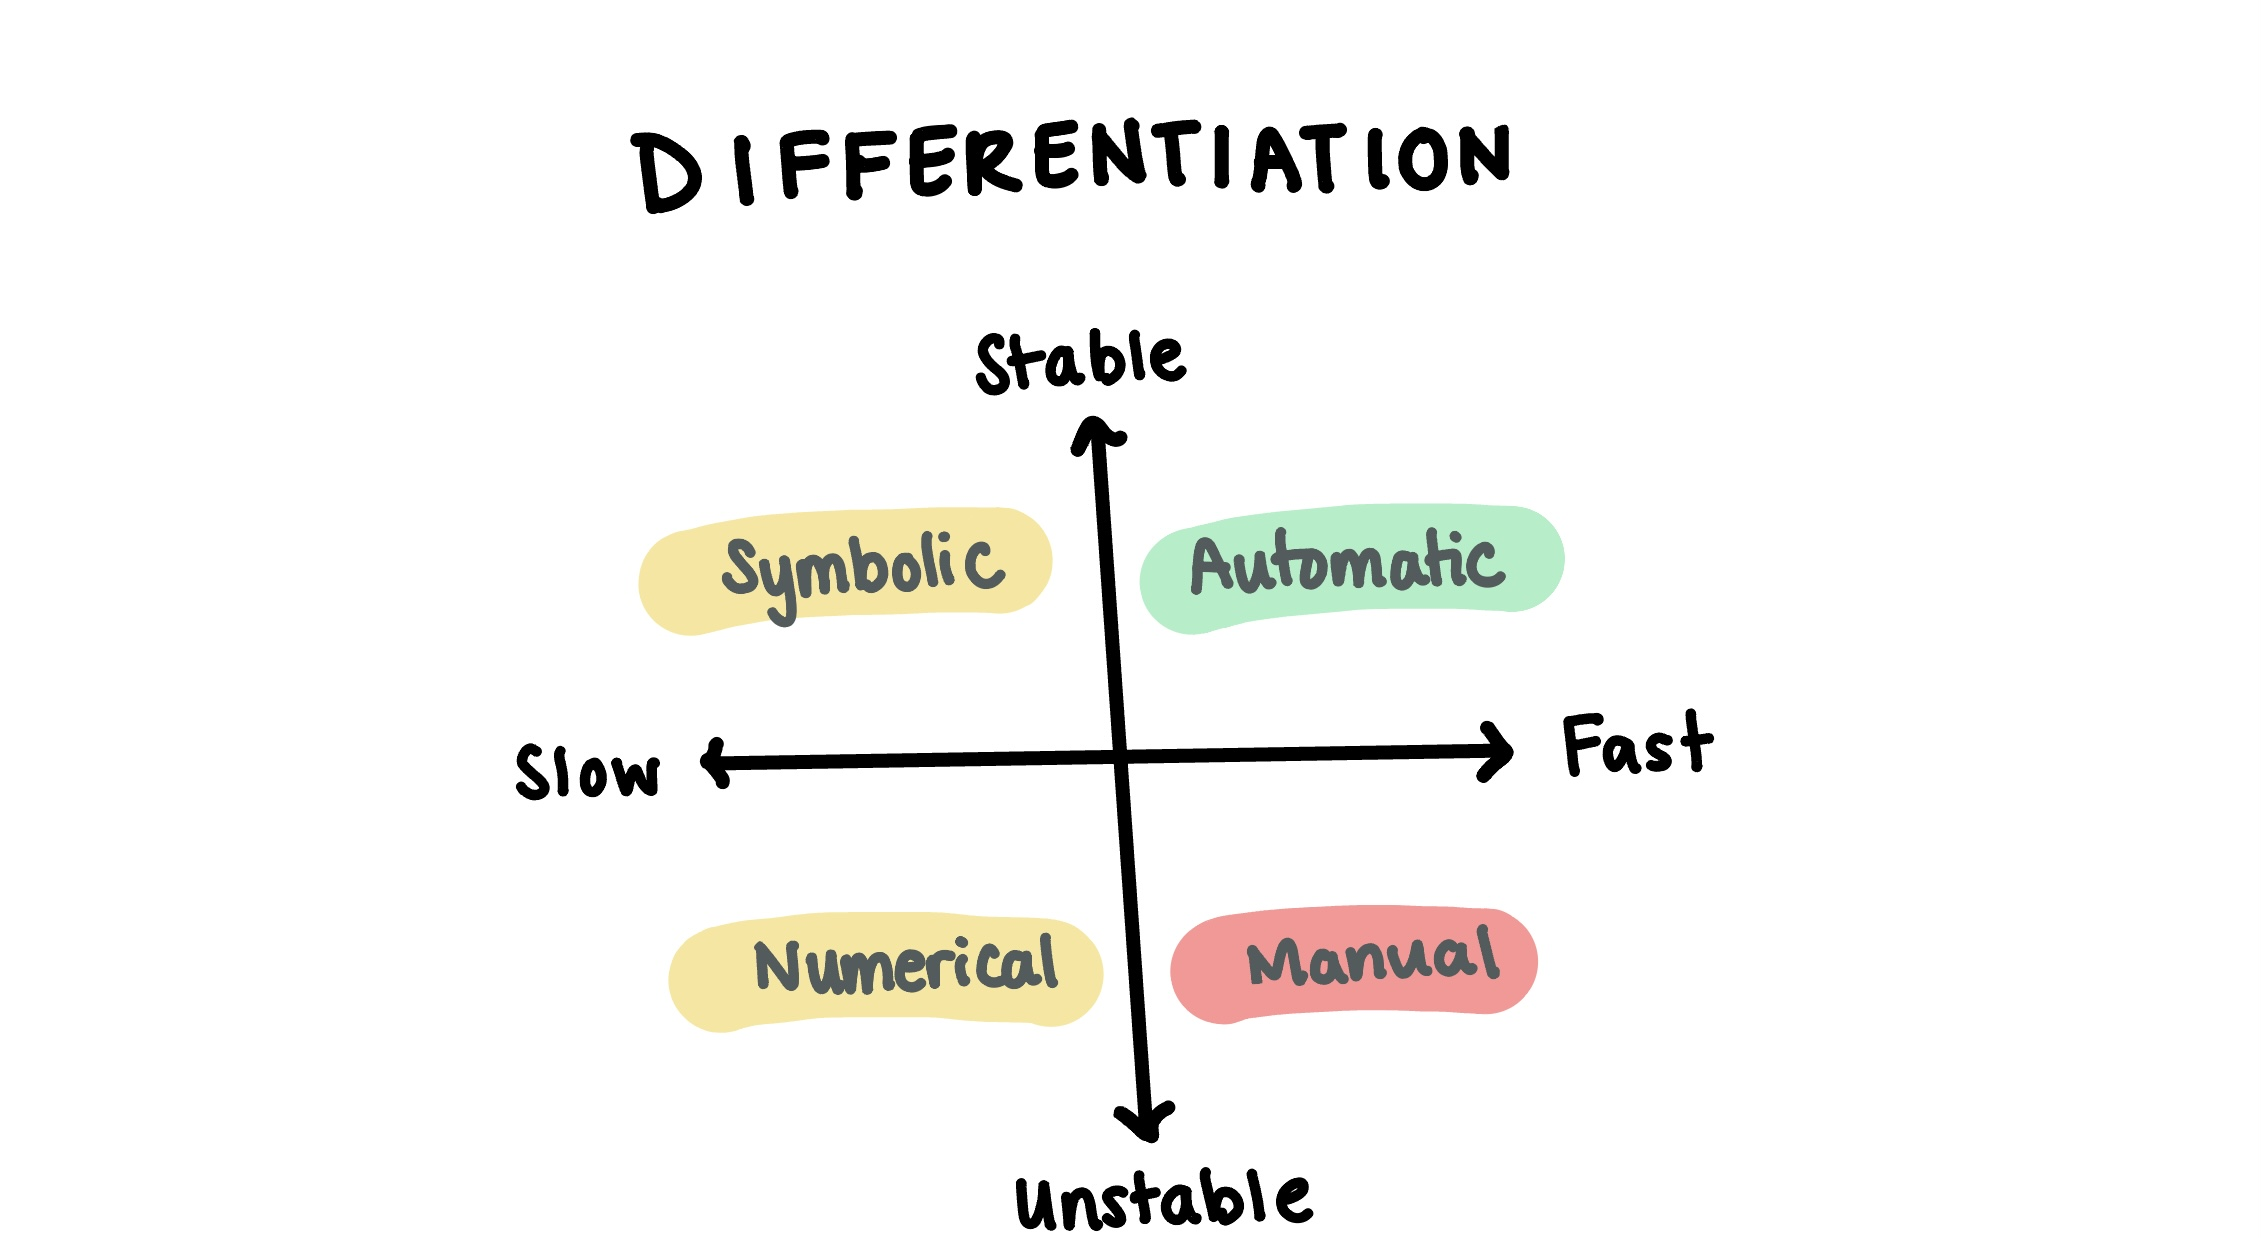
    
Our LYCET software overcomes the downsides of AD alternatives, and computes a gradient of functions both inexpensively and accurately via AD.

## Background

The foundation of LYCET’s AD algorithm is differential calculus, the study of rates at which quantities change. When the derivative of a function exists at a chosen input value, it can be graphed as the slope of the tangent line of the function at that point. The tangent line is the best linear approximation of the function near that input value. Thus, the derivative, $f^{\prime}(a)$, is the instantaneous rate of change of $y = f(x)$ with respect to $x$ when $x = a$.<br>
LYCET’s ability to perform automatic differentiation relies on applying the chain rule repeatedly to elementary arithmetic operations and expressions. By doing so, derivatives of arbitrary order can be computed automatically and accurately to working precision. The chain rule is a formula to compute the derivative of a composite function. It can be expressed as:
$f(g(x))^{\prime}=f^{\prime}(g(x)) \, \cdot \, g^{\prime}(x)$ for $f$ and $g$ sufficiently differentiable.<br>
To mechanically transform a numerical function and calculate the derivatives of such, the set of elementary functions must be identified. This set contains functions of a single variable (typically real or complex), that are continuous on their domains, and must be sufficiently differentiable. AD will not output the correct result if it is evaluating the derivative of a function where it is not differentiable. In LYCET, elementary functions will be implemented in the system together with their gradients.<br>
Examples of such expressions:<br>
* Constant functions<br>
* Rational powers of x<br>
* Exponential functions and their inverses<br> 
* Trigonometric functions and their inverses<br>
* Composite functions:<br>
    * Addition and subtraction<br>
    * Multiplication and division<br>
    * Polynomial functions<br>

These mechanical transformations are visually represented in computational graphs. These graphs act as functional descriptions of the required computation AD must perform. For a single function, there may be many possible computational graphs, but all final outputs must be equal. A computational graph takes in $m$ inputs, and can be described as $m$-ary (e.g. nullary, unary, binary, …). The final output can be single-valued or multiple-valued depending on the nature of the function (scalar or a vector). These graphs make use of intermediate results represented in the nodes of the graph. The arrows are the elementary operations performed on the intermediate results. The nodes represent the input values ($v_{i≤0}$ for $\lvert \{i\} \rvert=\lvert \{m\} \rvert)$ and the intermediate results ($v_{i>0}$). <br>
<br>
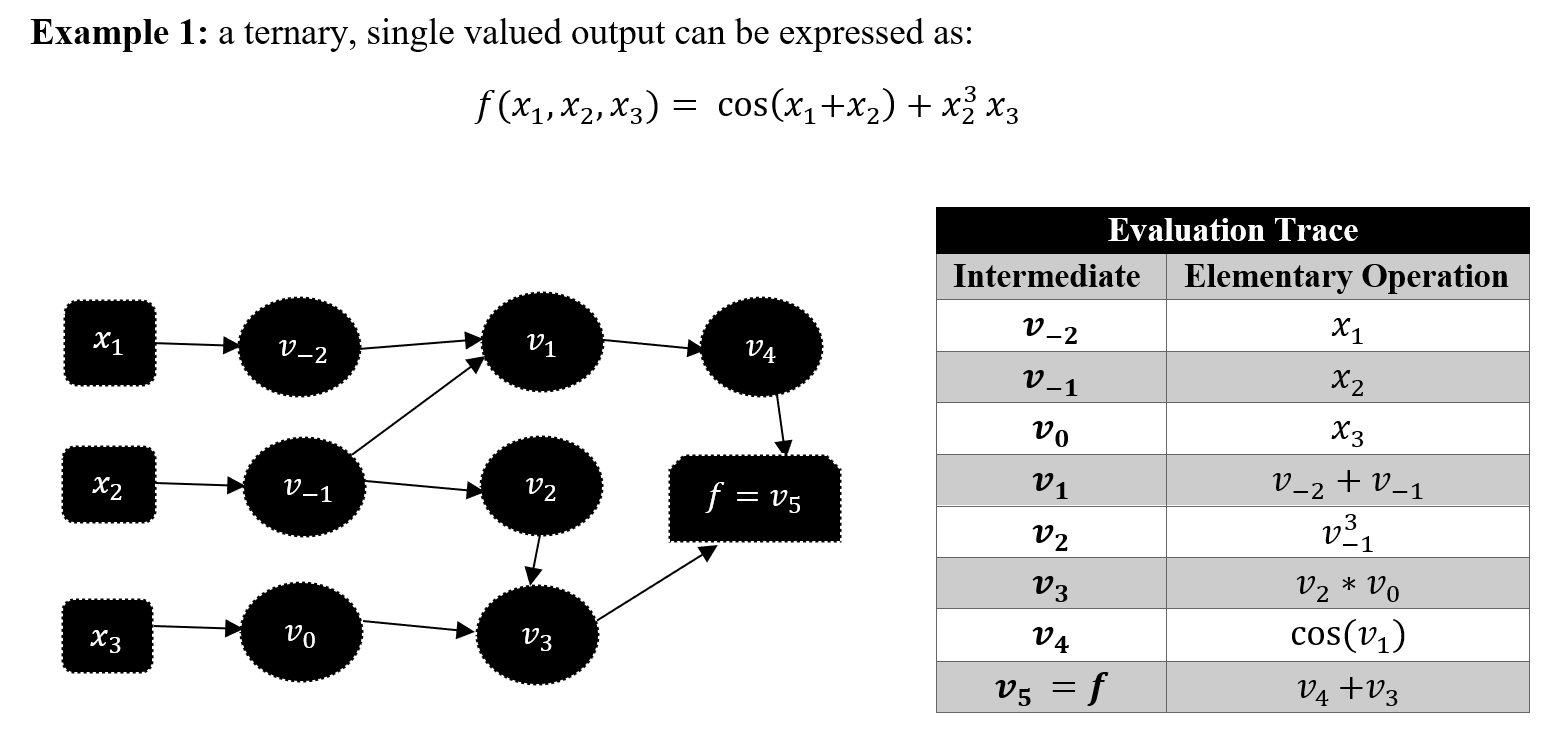<br><br>

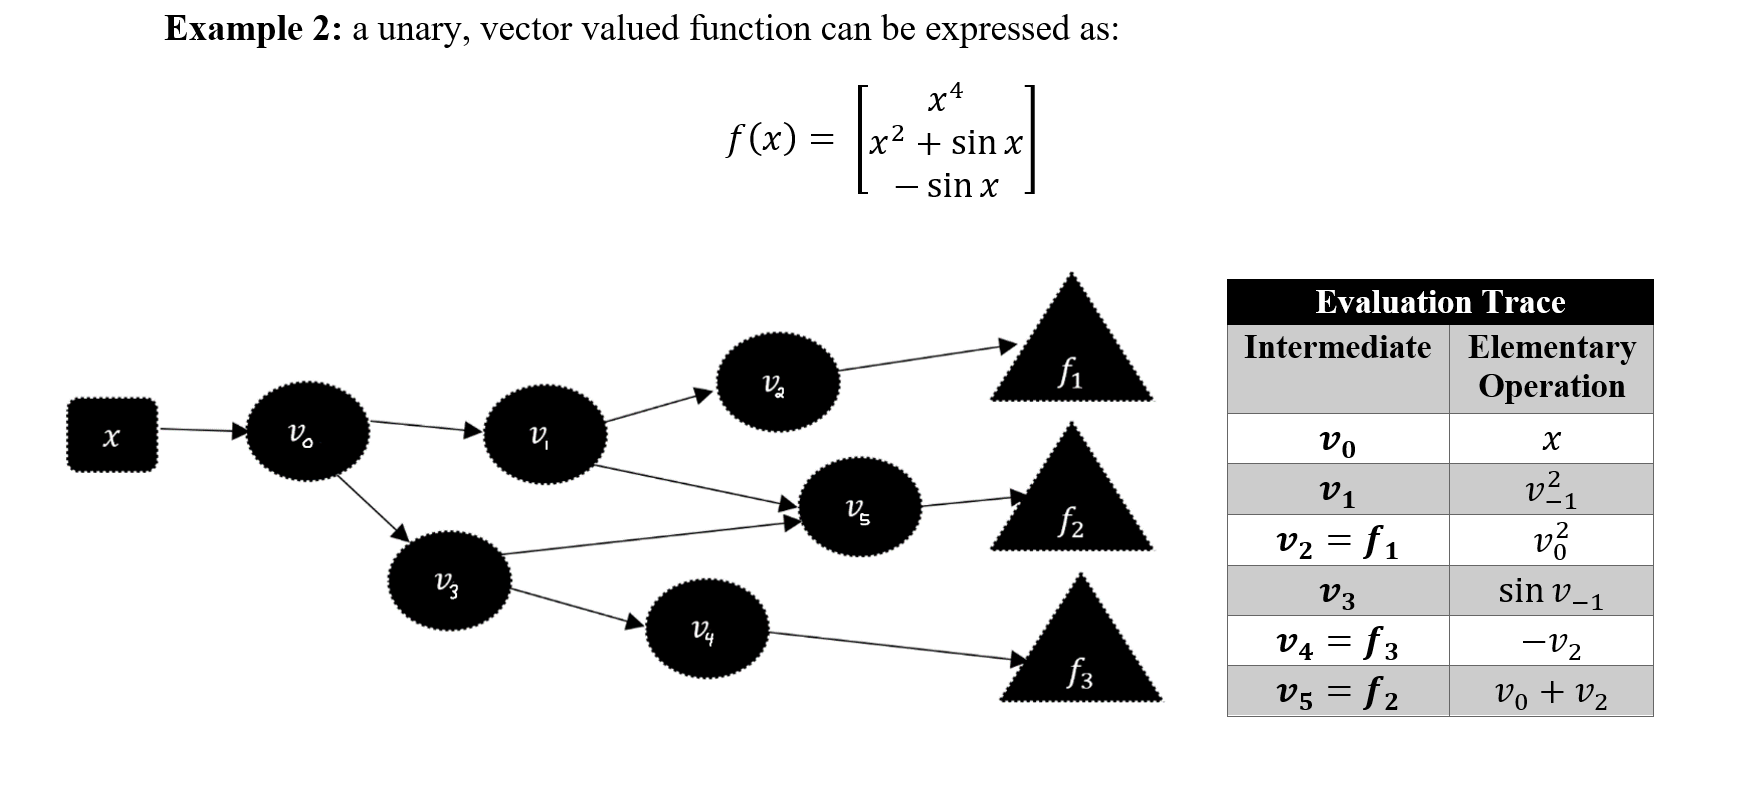

The evaluation trace of a function is required to keep track of the partial ordering and intermediate results after elementary operations are performed. In EXAMPLE 1 and 2 above, the tables provided are examples of the primal trace, the mechanical breakdown into elementary functions. When numeric(s) are fed into the function, the answer is computed step by step. The values of every step’s computation are stored, and a third column “Numerical Value”, is created.  
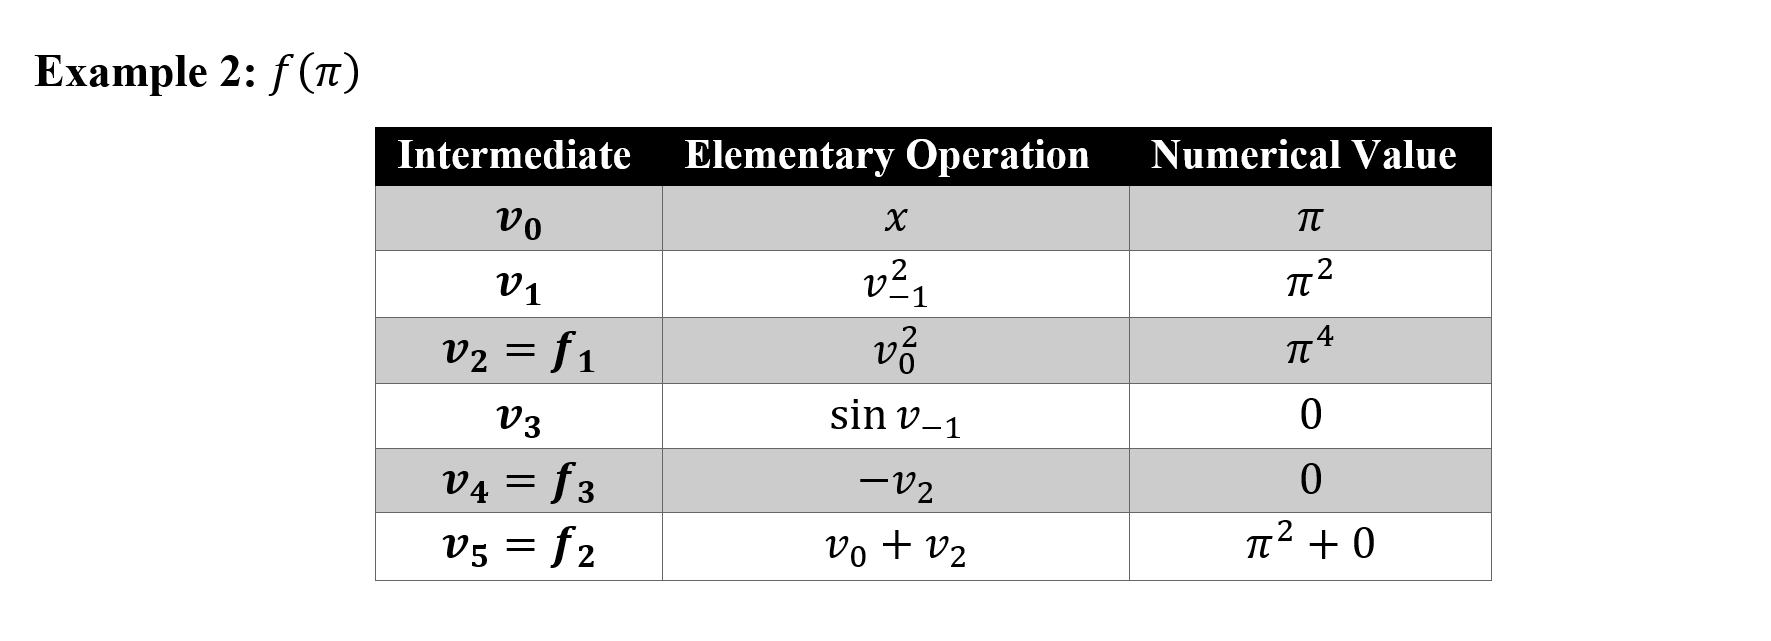

#### Modes
If there are many more outputs than there are number of inputs, then forward mode AD is more efficient. However, if there are many more inputs than outputs, reverse mode AD is more efficient.  

#### Forward Mode and Dual Numbers
Our LYCET software initializes forward mode AD and breaks down the function given by the user into a sequence of differentiable elementary operations. It tracks the result in the primal evaluation trace. The chain rule and well-known differentiation rules are then applied to each elementary operation, and a directional derivative is produced as the tangent evaluation trace. A simple implementation of the AD technique is via dual numbers, of the form $a +be$. The dual number is composed of part $a$, the intermediate result (say, function $f$) and part $b$ as $f^{\prime}$. With these dual numbers, AD can evaluate both the primal trace and the tangent trace with a single computation. Every dual number represents a row of the evaluation trace. AD then carries the primal and tangent trace forward as a pair but does not store previous dual numbers.<br> 
In LYCET, the simplicity of the chain rule above is engrained in the definition of the gradient for $f$. Forward mode is computing the gradient vector in the direction of a seed vector $p$. It is called the directional derivative. The most generalized form of what forward mode AD computes is a vector function $f(x): \mathbb{R}^m \mapsto \mathbb{R}^n$. The Jacobian is utilized when the function to be evaluated is vector valued, and it is represented as:
$J \cdot p$ where $J$ is an element of $ \mathbb{R}^{nxm}$ and $p$ is an element of $ \mathbb{R}^m$, the same size as our input values. The Jacobian of a vector-valued function in several variables generalizes the gradient of a scalar-valued function in several variables, which in turn generalizes the derivative of a scalar-valued function of a single variable. We are projecting the Jacobian in the direction given by $p$.
<center>$J_{f(x)}= \left(\frac{\delta f_i (x)}{\delta x_j }\right)_{ij}$</center>
With every pass of forward mode, the user feeds in a numerical direction vector that they are interested in, and the evaluation trace produces the accurate partial derivatives of their function at certain point. The following table shows an example of the complete forward mode evaluation trace for the EXAMPLE 2 above.

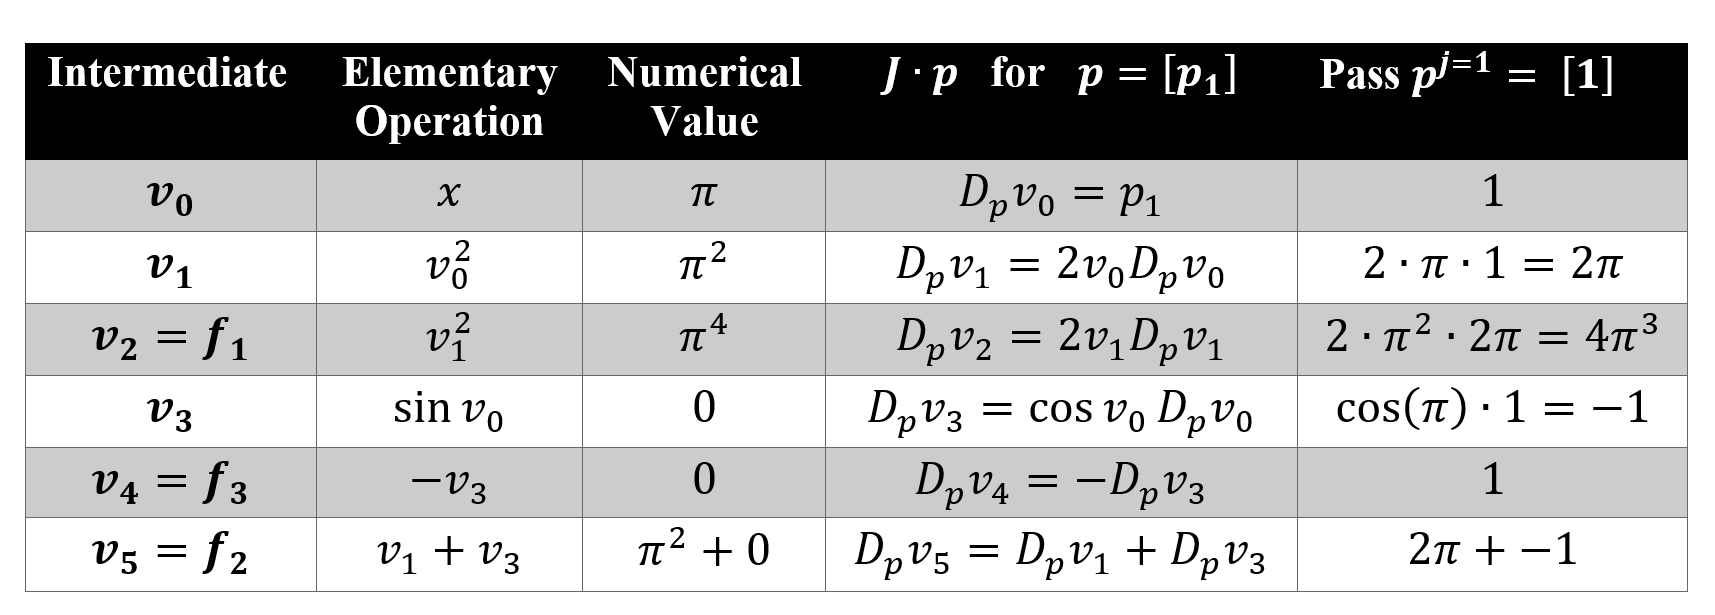<br>
### Reverse Mode
LYCET will implement the reverse mode method as a project extension. In reverse mode AD, the dependent variable to be differentiated is fixed and the derivative is computed with respect to each sub-expression recursively. The reverse mode only contains one pass (forward pass and reverse pass are considered one pass).
The following graph shows EXAMPLE 1 from above, of reverse accumulation with computational graph.

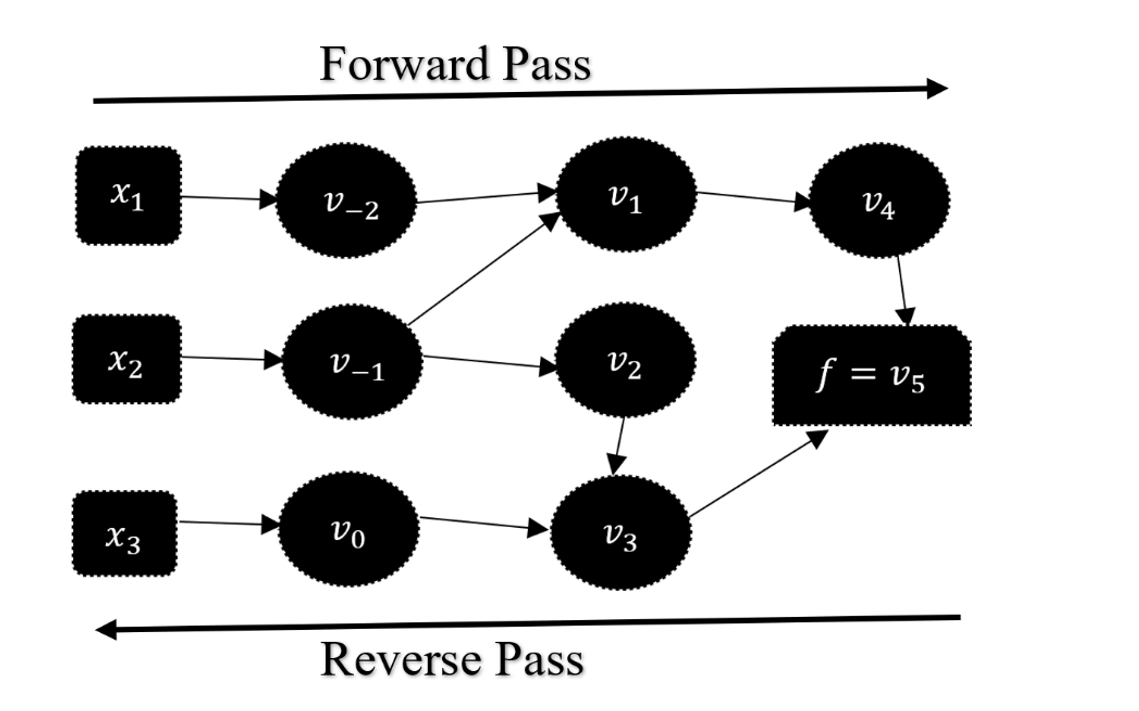<br><br>
!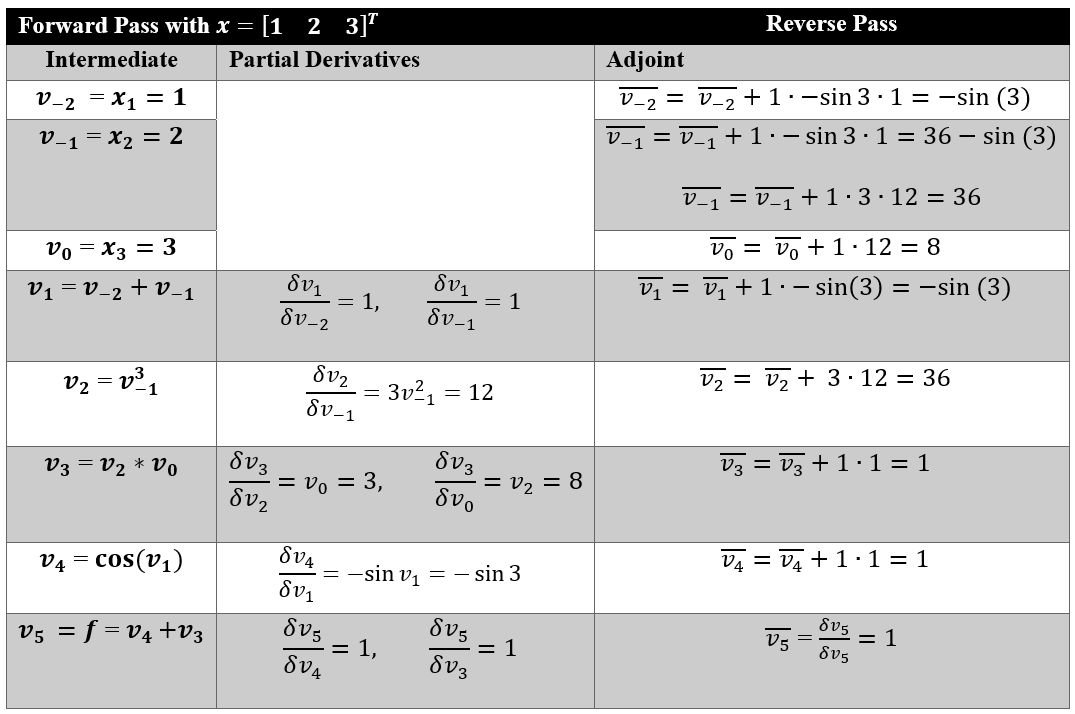

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> How to use LYCET


_See demo.ipynb in src directory for interactive Jupyter notebook._

### **1. Set up the repository and environment**

_1. For best practice, create a virtual environment:_\
```python3 -m venv /path/to/new/virtual/environment```
e.g. ```python3 -m venv my_venv```

_2. Activate the virtual environment by using:_\
```. my_venv/bin/activate```
(for the previous example)

_3. Install the required dependencies given by pyproject.toml by running:_\
```pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple LYCET_package```

_4. You are all set! Create a python script and run your code. As a demo, you can run the code below_

### **2. Create user script .py file and mport the following modules**
```
import numpy as np 
from LYCET_package import LYCET_Operations_Forward as fwd
from LYCET_package.ForwardMode import ForwardMode
from LYCET_package.DualNumber import DualNumber
from LYCET_package import LYCET_Operations_Reverse as rm
from LYCET_package.ReverseMode import ReverseMode
```

### **3. To conduct forward-mode AD, in the same script .py file, define $f(x)$ and where to evaluate $f$**
_In this example,_ $f(x) = e^x + sin(e^x)$ and $x = 4$

```
def user_function(x):
    return fwd.exp(x) + fwd.sin(fwd.exp(x))

x = 4
```
_**Case 1:** To compute the derivative, call the `ForwardMode` function:_
```
f, deriv = ForwardMode(user_function, x)

print(f"f(x) = {f}")
print(f"derivative(x) = {deriv}")
```
> f(x) = 53.66938209690045 \
> derivative(x) = 34.360705101546074

_**Case 2:** To compute the directional derivative, define the seed vector $p$ and call the `ForwardMode` function:_
```
def user_function(x):
    return fwd.exp(x[0]) + x[1]**2

x = [0, 2]
p = [1, 0]

f, deriv = ForwardMode(user_function, x, p)
print(f"f(x) = {f}")
print(f"derivative(x) = {deriv}")
```
> f(x) = 5.0 \
> derivative(x) = 1.0

_**Case 3:** To retrieve the gradient, call the `ForwardMode` and set `gradient=True`:_
```
gradient = ForwardMode(user_function, x, gradient=True)
print(gradient)
```
> [1. 4.]

_**Case 4:** To compute the Jacobian, call the `ForwardMode` and set `jacobian=True`:_
```
def user_function(x):
    return [fwd.exp(x[0]) + x[1]**2, x[0]*x[1]]

jacobian = ForwardMode(user_function, x, jacobian=True)
print(jacobian)
```
> [[1. 4.]\
 [2. 0.]]



### **4. To conduct reverse-mode AD, the following can be done in the same driver script**
Define the function $f(x)$ and where to evaluate \
_In this example,_ $f(x_1, x_2, x_3) = cos(x_1 + x_2) + (x_3x_2^3)$... and $x_1 = 1$, $x_2 = 2$, and $x_3 = 3$
```
def user_function(x1, x2, x3):
    return rm.cos(x1 + x2) + (x3 * x2**3)

x = [1, 2, 3]
```
_Call the `ReverseMode` function to evaluate $f(x)$ and its Jacobian_
```
f, J = ReverseMode(user_function, x)

print(f'lycet f(x) = {f}')
print(f'lycet J = {J}')
```
> lycet f(x) = 23.010007503399553 \
lycet J = [-0.1411200080598672, 35.858879991940135, 8]

## Software Organization

The structure of our project is the following:

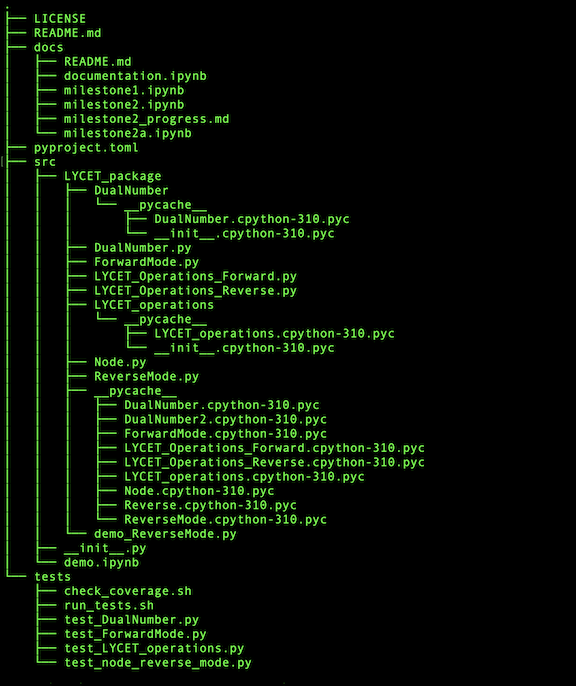

 We will distribute our package using TestPyPI with PEP517/518.


# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> Implementation


#### Required classes for forward- and reverse-mode AD:

* We will need 2 classes for the scaler input, scalar function case:
    * The first will be a class named DualNumber. This class, along with the LYCET_operations.py module simultaneously computes the final primal and tangent traces. It will implement the differentiation and calculate the generalized gradient.
    * The second class is called "Node" which will be used to carry out reverse-mode AD.  

#### Core data structures:

* Our core data Structure will consist of linear and nonlinear data structures.
* Python dictionaries, NumPy arrays and our dual number type will make up our linear data structures. 
* Dual numbers will be incorporated through a dynamic data structure class we implement.
* For reverse mode, we utilize tuples to store the primal trace tangents in forward pass, and a dictionary to store the adjoints when traversing backwards through the computational graph. 

#### Method and name attributes of our classes:

* The Dual class will have the following methods and attributes:
    * Attributes:
        The init method
        * real - is the function output evaluated at the inputed scalar
        * dual - is the derivative output evaluated at the inputed scalar
    * Methods:
        * The arithmetic operations for dual numbers are overloaded to accommodate the DualNumber data type. For example making the operators commutative and associative where appropriate. e.g: let $z_1$ and $z_2$ be two dual numbers where <br> $z_1 = a_1 + b_1\epsilon$ and $z_2 = a_2 + b_2\epsilon$ then $z_1*z_2 = a_1*a_2 + (a_1*b_2 + a_2*b_1)\epsilon = z_2*z_1$. <br>
        The list of methods for DualNumbers are: 
        \_\_init__ ,
        \_\_eq__ , 
        \_\_add__ ,
        \_\_sub__ ,
        \_\_neg__ ,
        \_\_mul__ ,
        \_\_truediv__ ,
        \_\_floordiv__ ,
        \_\_pow__ ,
        \_\_radd__ ,
        \_\_rsub__ ,
        \_\_rmul__ ,
        \_\_rtruediv__ ,
        \_\_rfloordiv__ ,
        \_\_rpow__ ,
        \_\_repr__
* The Reverse Mode Node class will have the following methods and attributes:
    * Attributes:
        The init method
        * value - is the function output evaluated at the input
        * derivative - a tuple that references the child node and its partial derivative
    * Methods: All of the same functions that were in LYCET_operations, and these are overloaded so that the derivative of the function evaluated at the input is returned. 

#### Think about how your basic operator overloading template should look like. 

* Forward-Mode:
    * Our basic operator template is designed such that elementary operations and derivates can be evaluated with dual numbers.
    * Our Basic operator overloading template will perform the derivatives following the sum, product and chain rule. The idea behind the operator is to define the rules of derivation via elementary functions. 
    * For elementary functions like sin, sqrt, log and exp, on a dual number the function should be applied to the prime trace and the function derivative should be applied to the tangent trace. 
    * For example to deal with sin() on an input dual number, it should return another dual number such that the output is sin() on the primal trace part and cos() on the tangent trace part.
* Reverse-Mode:
    * Similar to forward-mode, the complex function will be broken down into binary operations such that we only have to compute the partial derivative with respect to the intermediate variable. However, unlike forward-mode, when forward-pass is being conducted in reverse-mode AD, the chain rule is not implemented, thus the return outputs of the dunder methods are not the same as in forward-mode.

#### Defining elementary functions:
* We have a module called LYCET_operations_forward, which contains our overloaded elementary functions such as sin, cos, tan, arcsin, arccos, arctan, log ect (imported from numpy) and map their first order derivatives and store them in a dictionary for forward-mode.
* These elementary functions can then be passed through a dual number constructor, where the function will be applied and evaluated through the primal trace and the function derivative will be applied and evaluated through the tangent trace.
* For example to deal with sin() on an input dual number, it should return another dual number such that the output is sin() on the primal trace part and cos() on the tangent trace part.
* We also have a module called LYCET_operations_reverse for reverse mode AD, wherein these functions will return the value of f at that point, as well as the partial derivative(s) for that intermediate variable. 

#### Handling cases different dimensions of inputs and outputs:
* For the $f\colon\mathbb{R}^m\mapsto\mathbb{R}$ case we should create a partial derivative method that would take as inputs the function $f$ and the index of the variable that we want to differentiate $f$ with respect to. This method should hold the other variables constant. 
* Additionally we will implement a gradient method that will create a vector of partial derivatives using the partial derivate method listed above. 
* For the $f\colon\mathbb{R}^m\mapsto\mathbb{R}^n$ Case we should a create a Jacobian method. This would be achievable by reusing the partial derivate method listed above on the $N$ coordinate functions of $f$ to create the $J$ matrix.
 
#### External dependencies
* Our package only depends on NumPy as our external library.

## License

We chose the MIT license for our project. We would ultimately like our project to be freely available for anyone to benefit from. At the same time, if any of us ever wanted to build upon this work later for a project that might have to eventually become closed, we would like the freedom to adapt and use this work. Finally, we appreciate that the MIT license asserts that the code is "as-is", and we are not responsible if a mistake in our code has a high-cost result. Given that the MIT license is widely respected and widely used, we trust that it's standards will be upheld if questioned.

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> Broader Impact

Differentiable programming has been applied to many research areas in hopes to increase speed and stability of calculations. On the surface, making a process of one's research/business more efficient and less expensive sounds positive and beneficial to interested parties. However, there are many instances in the programming realm that ignore or outright disregard the long-term ethical implications of doing so. For instance, differentiable programming is often used to investigate optimization. This overall strategy is often followed by decision making and implementation. This reasonable application may have problematic strategies hidden in the larger strategy space. For example, in the world of business, optimization is geared toward maximizing profits. What are the consequences of seeing this optimization through? For the employees and/or functions of the business? Will people lose their livelihoods? Their health insurance?

Our LYCET package is a framework that allows the user to input any complex function that our encoded elementary operations support. What this function relates to in research and the real world is seemingly out of our control. We can state a disclaimer and say that we are not responsible for how it is used post publication, but this no longer fits within the mindset of the programming community. Since we are making our package available on PYPI, anyone within the Python community will have access to it and apply it to their problem. There are limits of what we can do, but we choose to not ignore the consequences of our package being used or misused. Of course, the first step is addressing these issues and stating them within our package instructions. 

We suggest to anyone that downloads and uses LYCET, to be aware and educated about the process of automatic differentiation and consider the after effects that may follow. As a whole, the computing research community must do more to address the downsides of our innovations. 
We require downloaders to ask these important questions before use of our package:
- What are the short-term and long-term impacts of this process?
- What are the net positive or net negative impacts of this program?
- Will this have an impact on my well-being or the well-being of people now or in the future?

There are many analytics websites for PyPI package downloads (https://pypistats.org/) so we are able to see how many times our package has been downloaded. We are interested in who is using our software package, for what purpose, and any improvements they think of. We are hoping to facilitate an open conversation about the broader impact of our simple AD package. We hope you enjoy our work! 

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> Software Inclusivity

In its current state, the tech-ecosystem needs to continue to foster an inclusive and diverse environment. The modern workforce is becoming increasingly diverse and it has been reported that this change is improving the complex nature of the work environment in several ways:
- Diverse and inclusive teams bring innovation
- Diverse teams are better at making decisions 
- Inclusivity leads to higher work engagement<br>
    - When companies foster a more inclusive work environment, 83% of Millennials are found to be actively engaged in their work
- American companies are simply becoming more diverse<br>
    - By 2044, more than half of all Americans are projected to belong to a minority group (those falling outside white non-Hispanic), accounting for the majority of the U.S. population by this time.

[Source](https://builtin.com/diversity-inclusion/diversity-in-the-workplace-statistics) 

We encourage the use of our LYCET package to be used in diverse and inclusive teams to solve real world problems. <br>
We have identified a few barriers that might arise when working with and executing our package.
- Similar to core Python development, our package was developed in English. This is the obviously the largest barrier for non-English speakers. To understand our documentation and comments, we encourage the use of Google translate.  
- We also want to make the public components of our code to be understandable to beginning programmers. We encourage the use of [Denigma](https://denigma.app/) and [PythonTutor](https://pythontutor.com/) to understand how and why we coded our package in this way.
- Finally, after our team submits the package and we make improvements after grading, we hope to push our package to a public Github. With our package being open-source, we welcome all coders of any age, culture, ethnicity, gender identity or expression, national origin, physical or mental difference, politics, race, religion, sex, sexual orientation, socio-economic status, and/or subculture to contribute to our code base. 

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> Future Feature Plan

**Changes to package:**
* Incorporating a function that generates a dynamic computational graph for the user to interact with, similar to PyTutor
* Implement a solver for second-order derivatives (i.e., Hessian)
* Currently, both forward and reverse mode utilize their own set of elementary operations, however in a future iteration of this package, it would be best to consolidate `lycet_operations_forward` and `lycet_operations_reverse` to eliminate any redundancy. 

**Research Applications:**
Team members would like to investigate how AD can be used in their own research interests.
For example:
   * Satellite data analysis 
       * In satellite data analysis, automatic differentiation can be used to calculate the derivatives of functions that describe the physical processes being studied, such as the motion of satellites or the behavior of gases in the atmosphere.
       * AD can also be used to optimize the parameters of machine learning algorithms that are applied to satellite data, which can improve the accuracy of the models and the results of the analysis.
   * Modeling fluid in microfluidics
       * By using automatic differentiation, researchers can quickly and accurately calculate the derivatives of the equations describing the fluid's behavior. These derivatives can then be used to solve the equations and model the fluid's motion. This can help researchers better understand the behavior of fluids in microfluidic systems and design more effective microfluidic devices.

### This is the end. Thank you!
<3 Team18